<a href="https://colab.research.google.com/github/ravi-kiran-iiml/my_git/blob/master/CC_Fraud_detection_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brief about this dataset from Kaggle.com : 

Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

First step: We import the dataset from the respective folder

In [1]:
from google.colab import files
uploaded = files.upload()

Saving creditcard_sample.csv to creditcard_sample.csv


Next we create the dataframe using pandas.read_csv function


Dataframe.head() gives us a picture of the first few rows of the dataset

In [2]:
import io
import pandas as pd

dataframe = pd.read_csv(io.BytesIO(uploaded['creditcard_sample.csv']))
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


First 30 columns in this dataset are the input variables while the 31st column is the output i.e. if the transaction was a fraudulent transaction. 

So, we create 'X' as the array of the input variables while we keep the output label ( 0 or 1 ) in the 'y' array

In [3]:
X = dataframe.iloc[:,0:30].values
y = dataframe.iloc[:,30:31].values
print(X.shape)
print(y.shape)

(5578, 30)
(5578, 1)


The input array has several columns with data ranging in their respective scales. To normalize the data we use StandardScaler module to normalize the values.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

After having normalized the input values, now it is time to split the data in training and validation datasets. Here, we have taken 30% as the validation dataset and 70% to the training dataset.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Now we are ready to create the neural network model. This is a binary classification type feedforward network. 

The input layer has 30 variables. We consider two dense layers of 64 neurons each before finally creating the output layer. We have considered 'RelU' activation for the dense layers while 'Sigmoid' for the output layer. This approach is as per the book 'Deep learning with python' book by Francois Chollet.

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

Having created and compiled the neural model, now we train the dataset for 50 epochs and a batch size of 500

In [8]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 500, validation_data=(x_test, y_test))

Train on 4462 samples, validate on 1116 samples
Epoch 1/50
4462/4462 [==============================] - 0s 77us/step - loss: 1.2830 - binary_accuracy: 0.1255 - val_loss: 0.9558 - val_binary_accuracy: 0.1828
Epoch 2/50
4462/4462 [==============================] - 0s 6us/step - loss: 0.9659 - binary_accuracy: 0.2981 - val_loss: 0.7525 - val_binary_accuracy: 0.4767
Epoch 3/50
4462/4462 [==============================] - 0s 6us/step - loss: 0.7781 - binary_accuracy: 0.4978 - val_loss: 0.6139 - val_binary_accuracy: 0.7760
Epoch 4/50
4462/4462 [==============================] - 0s 6us/step - loss: 0.6414 - binary_accuracy: 0.6981 - val_loss: 0.5083 - val_binary_accuracy: 0.9400
Epoch 5/50
4462/4462 [==============================] - 0s 6us/step - loss: 0.5337 - binary_accuracy: 0.8250 - val_loss: 0.4230 - val_binary_accuracy: 0.9848
Epoch 6/50
4462/4462 [==============================] - 0s 6us/step - loss: 0.4525 - binary_accuracy: 0.9050 - val_loss: 0.3540 - val_binary_accuracy: 0.9964
Epo

The output history has a history method which results in the dictionary of the output of the training step

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

Let us look at the training vs validation graphically. We use matplotlib for the purpose.

As we can see here, the model converges well after only a few epochs.

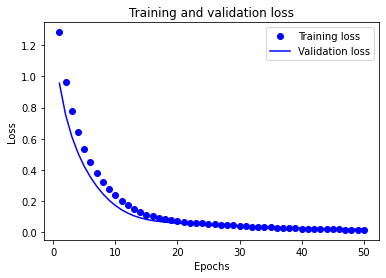

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Similarly, we plot for training versus validation accuracy. 

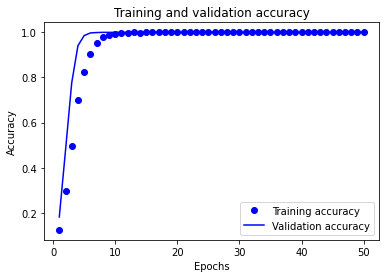

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

accuracy_values = history_dict['binary_accuracy']
val_accuracy_values = history_dict['val_binary_accuracy']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluation of the results

In [12]:
training_results = model.evaluate(x_train, y_train)
print("Training results: {}".format(training_results))
test_results = model.evaluate(x_test, y_test)
print("'Test results: {}".format(test_results))

4462/4462 [==============================] - 0s 23us/step
Training results: [0.012573235232845544, 0.9995517730712891]
1116/1116 [==============================] - 0s 26us/step
'Test results: [0.02000831012150079, 0.9991039633750916]


Predictions on the test set

In [13]:
y_predictions = model.predict(x_test)

deviation = 0
for i in range(len(x_test)):
  y_actual = float(y_test[i])
  y_predicted = float(y_predictions[i])
  diff = y_actual - y_predicted
  deviation += diff

print(deviation)

0.7392819463581644


In [14]:
y_actual = [int(i) for i in y_test]
y_predicted = [int(i) for i in y_predictions]

error_count = 0

for i in range(len(y_actual)):
  if y_actual[i] == y_predicted[i]:
    continue
  else:
    error_count += 1

error_count_percent = ((error_count * 100) / len(y_actual))
success_count_percent = (len(y_actual) - error_count)*100 / len(y_actual)

print("Number of error counts is : {}". format(error_count))
print("Total number of data rows is : {}". format(len(y_actual)))
print("Error count percentage is : {}".format(error_count_percent))
print("Success count percentage is : {}".format(success_count_percent))


Number of error counts is : 1
Total number of data rows is : 1116
Error count percentage is : 0.08960573476702509
Success count percentage is : 99.91039426523298
